To run the Jupyter notebook install sckit-lean in a conda environment
```
conda create -n sklearn-env -c conda-forge scikit-learn
conda activate sklearn-env
```
and install Shap ( https://github.com/slundberg/shap ) and a Jupyter kernel
```
pip install shap
pip install jupyter
python -m ipykernel install --sys-prefix --name=sklearn-env
```


In [1]:
import pandas as pd
import shap
import sklearn
import re
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = pd.read_csv("fascism_data.csv", header=0, sep=";")
dataset.columns = [column.replace('\n',' ') for column in dataset.columns]
dataset.columns = [re.sub('\(.*?\)','',column).strip() for column in dataset.columns]
dataset.head()

,Hostility Environment,Economic Crisis,Political Crisis,Political Violence,Humiliation Score,Stability Democratic Institutions,Fascism,Country,Date,Comment
0,0.6,1.0,1.0,1.0,1.0,-1.0,2.0,Germany,"After WWI (""humiliating defeat"")",Nazism / Treaty of Versailles
1,0.5,1.0,-1.0,1.0,1.0,-1.0,2.0,Italy,"After WWI (""mutilated victory"")",Fascism / Treaty of Versailles
2,0.6,1.0,1.0,0.0,1.0,-1.0,2.0,Austria-Hungary,"After WWI (""humiliating defeat"")",Nazism / Treaty of Versailles
3,-1.0,1.0,-1.0,-1.0,-1.0,1.0,0.0,France,After WWI,NaN
4,0.3,1.0,-1.0,-1.0,0.5,0.5,1.0,Spain,After WWI,Francoism / Authoritarianism / Loss of Spanish...


In [3]:
from sklearn.model_selection import train_test_split
data = dataset.drop(['Fascism', 'Country', 'Date', 'Comment'], axis=1)
labels = dataset.Fascism
X_train, X_test, y_train, y_test = train_test_split(data.values, 
                                                    labels, 
                                                    random_state=0, 
                                                    test_size=0.15) 

In [4]:
features = data.columns
features

Index(['Hostility Environment', 'Economic Crisis', 'Political Crisis',
       'Political Violence', 'Humiliation Score',
       'Stability Democratic Institutions'],
      dtype='object')

In [5]:
model = MLPClassifier(hidden_layer_sizes=(100, ), 
                    max_iter=480, 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4, 
                    random_state=1,
                    learning_rate_init=.1)

model.fit(X_train, y_train)
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

Training set score: 1.000000
Test set score: 1.000000


In [6]:
germany = data.values[0]
print("Germany: ", germany, '=>', model.predict([germany]))

spain = data.values[4]
print("Spain: ", spain, '=>', model.predict([spain]))

uk = data.values[5]
print("UK: ", uk, '=>', model.predict([uk]))

Germany:  [ 0.6  1.   1.   1.   1.  -1. ] => [2.]
Spain:  [ 0.3  1.  -1.  -1.   0.5  0.5] => [1.]
UK:  [-1.  1. -1. -1. -1.  1.] => [0.]


In [7]:
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test, nsamples=30)
len(shap_values)

  0%|          | 0/5 [00:00<?, ?it/s]

5

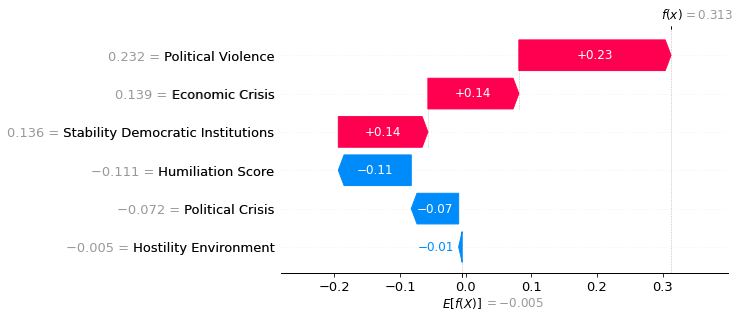

In [8]:
i = 1
shap_object = shap.Explanation(base_values = shap_values[i][0],
  values = shap_values[i],
  feature_names = features,
  data = shap_values[i].data)

shap.plots.waterfall(shap_object)

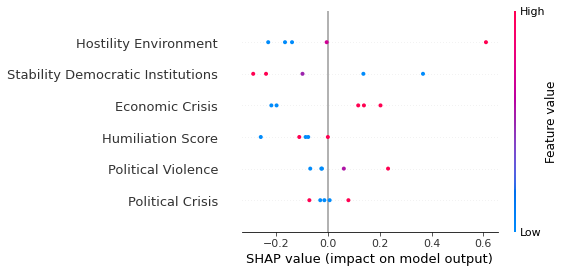

In [9]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig('shap_values.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

In [10]:
us_trump = [0.0, -0.5, 1.0, -0.5, 0.1, 0.2]
print("US: ", model.predict([us_trump]))

US:  [1.]
